# Imports

In [4]:
from google.colab import files
uploaded = files.upload()


Saving data3.mat to data3.mat
Saving data2.mat to data2.mat
Saving data1.mat to data1.mat


In [9]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             precision_score, recall_score, f1_score)
from sklearn.svm import LinearSVC
from scipy.io import loadmat
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from matplotlib import cm


# Visualise

In [11]:
def plot_classes(data, target_array):
    flat = target_array.flatten()
    group_zero = data[flat == 0]
    group_one = data[flat == 1]

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(group_zero[:, 0], group_zero[:, 1], color='green', marker='D', label='Class 0')
    ax.scatter(group_one[:, 0], group_one[:, 1], color='purple', marker='*', label='Class 1')
    ax.set_title("Initial Data Visualization")
    ax.set_xlabel("Attribute A")
    ax.set_ylabel("Attribute B")
    ax.legend()
    ax.grid(True)
    plt.show()


# Part 1

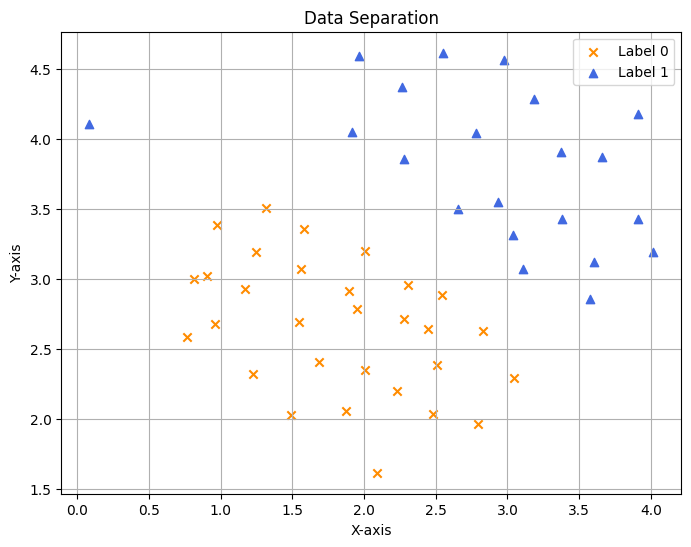

In [7]:
mat=loadmat('./data1.mat')

X=mat['X']
y=mat['y'].astype(int)
plot_classes(X,y)

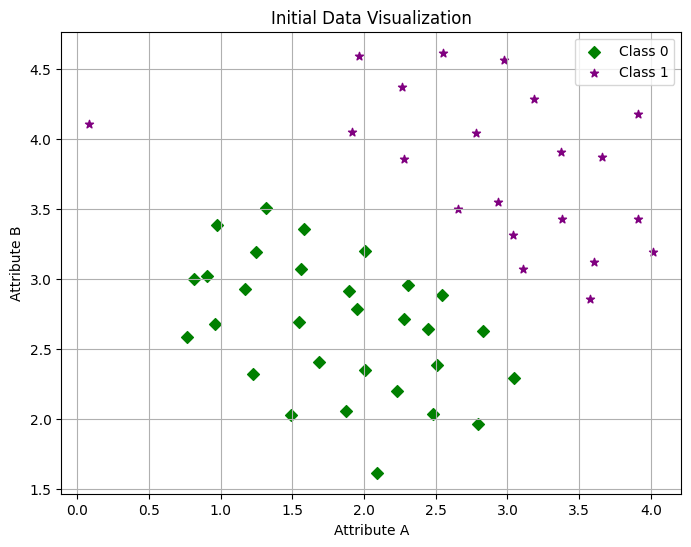

<ipython-input-13-de173c53d848>:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=cm.get_cmap("viridis"), edgecolors='black')
<ipython-input-13-de173c53d848>:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=cm.get_cmap("viridis"), edgecolors='black')
<ipython-input-13-de173c53d848>:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=cm.get_cmap("viridis"), edgecolors='black')
<ipython-input-13-de173c53d848>:44: MatplotlibDeprecationWarning: The get

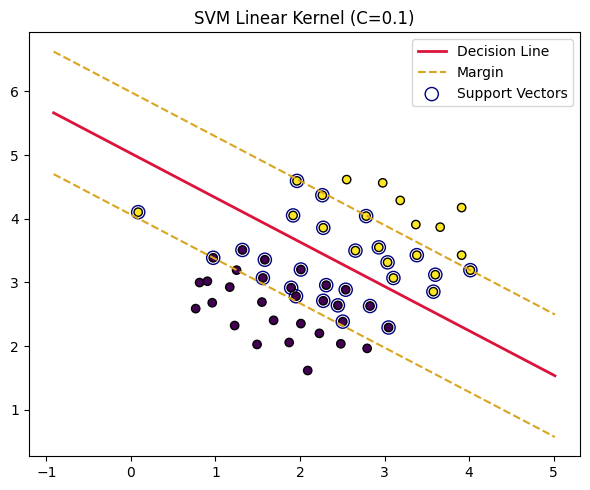

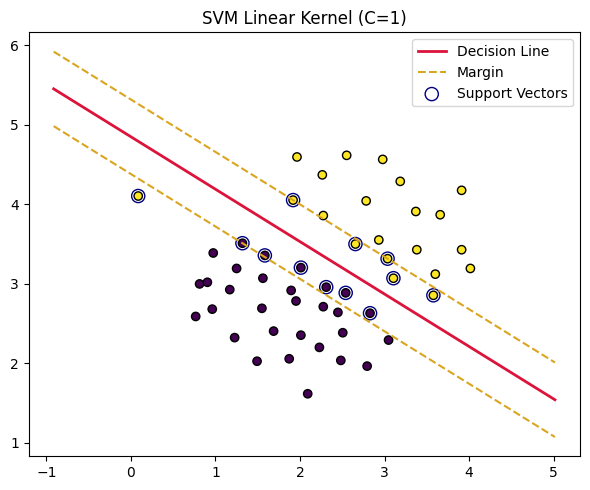

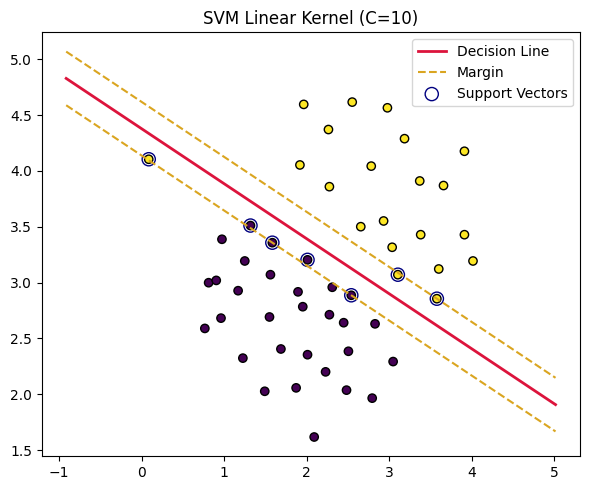

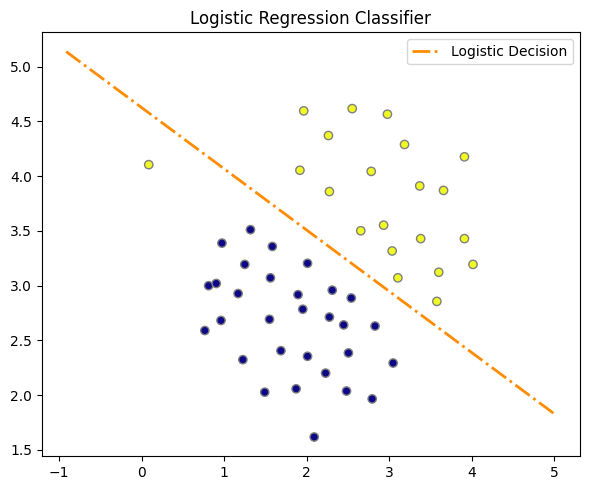

In [13]:
data = loadmat("data1.mat")
features = data["X"]
targets = data["y"].ravel()

plot_classes(features, targets)

penalty_vals = [0.1, 1, 10]
for index, penalty in enumerate(penalty_vals):
    model = svm.SVC(kernel='linear', C=penalty)
    model.fit(features, targets)

    coef = model.coef_.ravel()
    slope = -coef[0] / coef[1]
    x_line = np.linspace(features[:, 0].min() - 1, features[:, 0].max() + 1, 200)
    y_line = slope * x_line - model.intercept_[0] / coef[1]

    margin = 1 / np.linalg.norm(coef)
    offset = np.sqrt(1 + slope ** 2) * margin
    y_upper = y_line + offset
    y_lower = y_line - offset

    plt.figure(figsize=(6, 5))
    plt.plot(x_line, y_line, color='crimson', linewidth=2, label='Decision Line')
    plt.plot(x_line, y_upper, color='goldenrod', linestyle='--', label='Margin')
    plt.plot(x_line, y_lower, color='goldenrod', linestyle='--')
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                edgecolors='navy', facecolors='none', s=90, label='Support Vectors')
    plt.scatter(features[:, 0], features[:, 1], c=targets,
                cmap=cm.get_cmap("viridis"), edgecolors='black')
    plt.title(f"SVM Linear Kernel (C={penalty})")
    plt.legend()
    plt.tight_layout()

log_clf = LogisticRegression()
log_clf.fit(features, targets)
log_w = log_clf.coef_[0]
log_slope = -log_w[0] / log_w[1]
x_vals = np.linspace(features[:, 0].min() - 1, features[:, 0].max() + 1, 150)
y_vals = log_slope * x_vals - log_clf.intercept_[0] / log_w[1]

plt.figure(figsize=(6, 5))
plt.plot(x_vals, y_vals, color='darkorange', linestyle='-.', linewidth=2, label='Logistic Decision')
plt.scatter(features[:, 0], features[:, 1], c=targets,
            cmap=cm.get_cmap("plasma"), edgecolors='gray')
plt.title("Logistic Regression Classifier")
plt.legend()
plt.tight_layout()
plt.show()

# Part 2

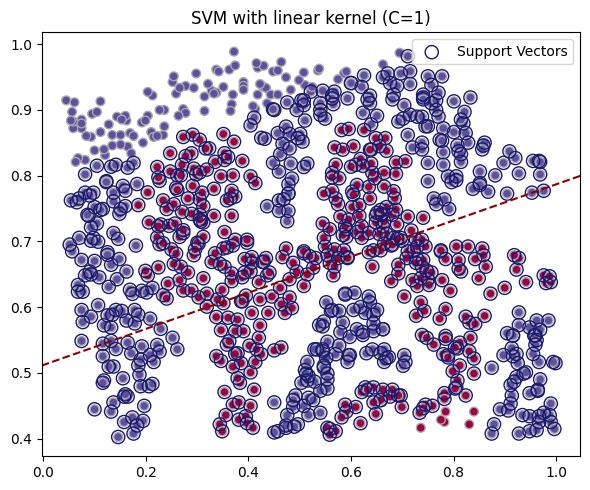

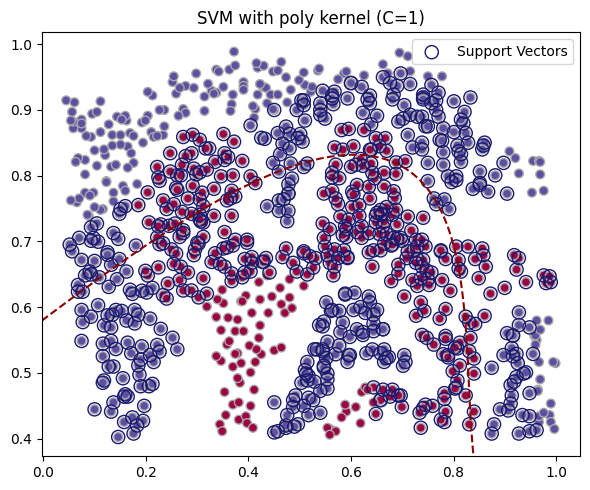

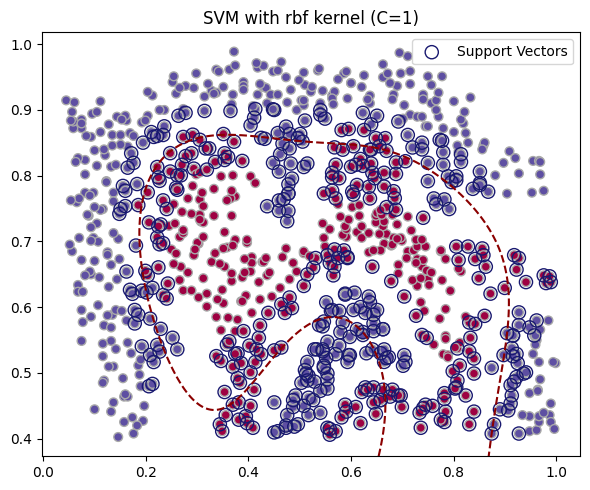

In [14]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

data_loaded = loadmat('data2.mat')
points = data_loaded['X']
labels = data_loaded['y'].ravel()

kernel_types = ['linear', 'poly', 'rbf']

def plot_decision_boundary(model, inputs, targets, title_text):
    plt.figure(figsize=(6, 5))
    plt.scatter(inputs[:, 0], inputs[:, 1], c=targets, cmap=plt.cm.Spectral, s=40, edgecolors='darkgrey')

    axis = plt.gca()
    x_extent = axis.get_xlim()
    y_extent = axis.get_ylim()

    grid_x, grid_y = np.meshgrid(
        np.linspace(x_extent[0], x_extent[1], 250),
        np.linspace(y_extent[0], y_extent[1], 250)
    )

    mesh_points = np.c_[grid_x.ravel(), grid_y.ravel()]
    decision_vals = model.decision_function(mesh_points).reshape(grid_x.shape)

    axis.contour(grid_x, grid_y, decision_vals, levels=[0], colors='darkred', linestyles='--')
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=90, edgecolors='midnightblue', facecolors='none', label='Support Vectors')
    plt.title(title_text)
    plt.legend()
    plt.tight_layout()
    plt.show()

for k in kernel_types:
    classifier = svm.SVC(kernel=k, C=1)
    classifier.fit(points, labels)
    plot_decision_boundary(classifier, points, labels, f"SVM with {k} kernel (C=1)")


# Part 3

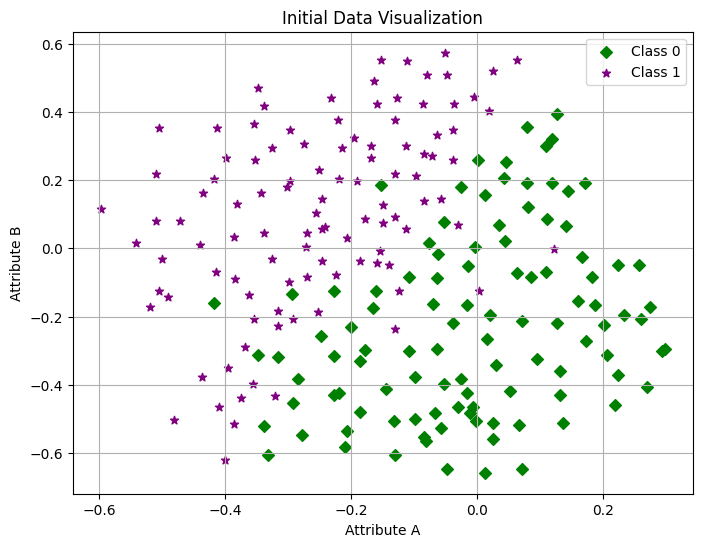

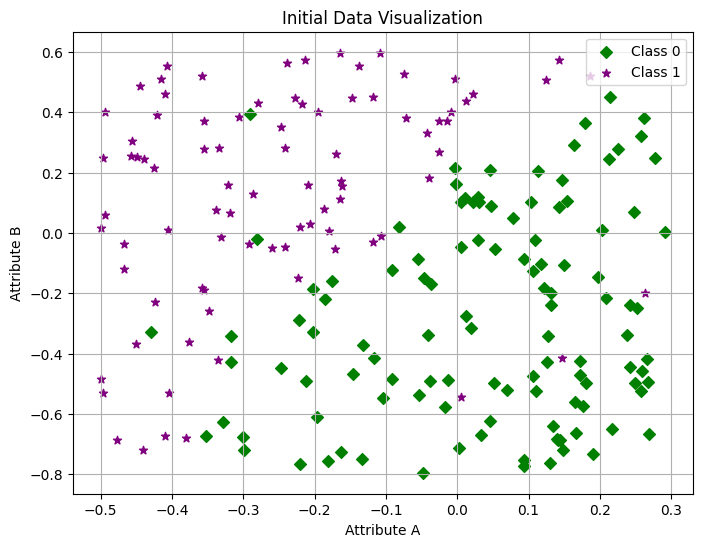

C = 0.01 -> Validation Accuracy = 0.4350
C = 0.1 -> Validation Accuracy = 0.9200
C = 1 -> Validation Accuracy = 0.9500
C = 10 -> Validation Accuracy = 0.9550
C = 100 -> Validation Accuracy = 0.9600


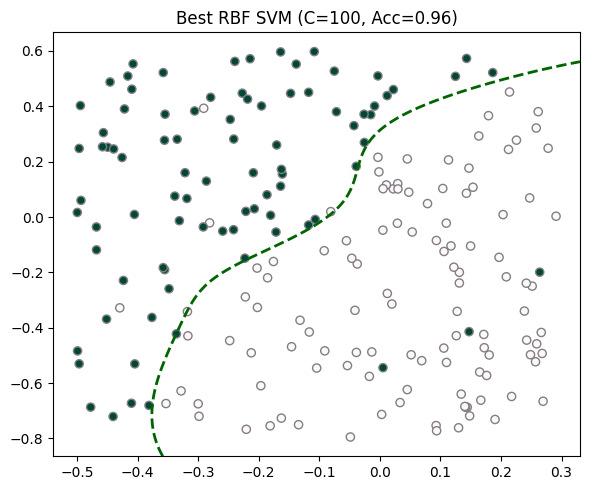

In [15]:


data_bundle = loadmat('./data3.mat')

features_train = data_bundle['X']
targets_train = data_bundle['y'].astype(int)
features_valid = data_bundle['Xval']
targets_valid = data_bundle['yval'].astype(int)

plot_classes(features_train, targets_train)
plot_classes(features_valid, targets_valid)

train_X = features_train
train_y = targets_train.ravel()
val_X = features_valid
val_y = targets_valid.ravel()

c_options = [0.01, 0.1, 1, 10, 100]

optimal_model = None
highest_acc = 0
chosen_c = None

for c_val in c_options:
    classifier = svm.SVC(kernel='rbf', C=c_val)
    classifier.fit(train_X, train_y)
    pred = classifier.predict(val_X)
    acc_score = accuracy_score(val_y, pred)
    print(f"C = {c_val} -> Validation Accuracy = {acc_score:.4f}")
    if acc_score > highest_acc:
        optimal_model = classifier
        highest_acc = acc_score
        chosen_c = c_val

def Plot_final(model, data, labels, heading):
    plt.figure(figsize=(6, 5))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=plt.cm.PuBuGn, s=35, edgecolors='gray')
    ax = plt.gca()
    limit_x = ax.get_xlim()
    limit_y = ax.get_ylim()
    mesh_x, mesh_y = np.meshgrid(
        np.linspace(limit_x[0], limit_x[1], 250),
        np.linspace(limit_y[0], limit_y[1], 250)
    )
    grid = np.c_[mesh_x.ravel(), mesh_y.ravel()]
    z_values = model.decision_function(grid).reshape(mesh_x.shape)
    ax.contour(mesh_x, mesh_y, z_values, levels=[0], linewidths=2, linestyles='--', colors='darkgreen')
    plt.title(heading)
    plt.tight_layout()
    plt.show()

Plot_final(optimal_model, val_X, val_y, f"Best RBF SVM (C={chosen_c}, Acc={highest_acc:.2f})")


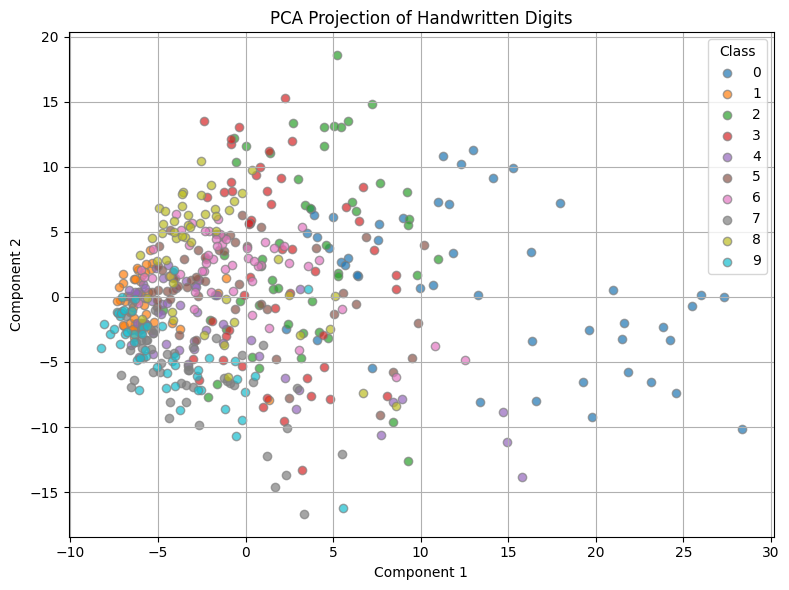

In [17]:


mnist_data = fetch_openml('mnist_784', version=1, as_frame=False)
features_raw = mnist_data["data"]
labels_raw = mnist_data["target"].astype(int)

each_class = 50
chosen_X = []
chosen_y = []

for i in range(10):
    selected_idx = np.flatnonzero(labels_raw == i)[:each_class]
    chosen_X.append(features_raw[selected_idx])
    chosen_y.append(labels_raw[selected_idx])

combined_X = np.vstack(chosen_X)
combined_y = np.hstack(chosen_y)

standardizer = StandardScaler()
X_normalized = standardizer.fit_transform(combined_X)

pca_instance = PCA(n_components=2)
X_reduced = pca_instance.fit_transform(X_normalized)

plt.figure(figsize=(8, 6))
for cls in range(10):
    plt.scatter(X_reduced[combined_y == cls, 0],
                X_reduced[combined_y == cls, 1],
                label=f"{cls}", alpha=0.7, edgecolors='gray')

plt.title("PCA Projection of Handwritten Digits")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Class")
plt.grid(visible=True)
plt.tight_layout()
plt.show()


In [20]:


dataset = fetch_openml('mnist_784', version=1, as_frame=False)
features_all, labels_all = dataset["data"], dataset["target"].astype(int)

samples_limit = 300
grouped_X, grouped_y = [], []

for label in range(10):
    selected = np.flatnonzero(labels_all == label)[:samples_limit]
    grouped_X.append(features_all[selected])
    grouped_y.append(labels_all[selected])

full_X = np.vstack(grouped_X)
full_y = np.hstack(grouped_y)

normalized_X = StandardScaler().fit_transform(full_X)

X_train, X_test, y_train, y_test = train_test_split(
    normalized_X, full_y, test_size=0.3, stratify=full_y, random_state=42
)

kernel_list = ['linear', 'rbf']
C_list = [1, 10]
evaluation = []

for ker in kernel_list:
    for c_val in C_list:
        classifiers_ova = {}

        for digit_class in range(10):
            binary_y = (y_train == digit_class).astype(int)
            model = SVC(kernel=ker, C=c_val)
            model.fit(X_train, binary_y)
            classifiers_ova[digit_class] = model

        def ova_predict(data):
            scores = np.column_stack([
                classifiers_ova[i].decision_function(data) for i in range(10)
            ])
            return scores.argmax(axis=1)

        pred_ova = ova_predict(X_test)
        acc_ova = accuracy_score(y_test, pred_ova)

        classifiers_ovo = {}
        for a in range(10):
            for b in range(a + 1, 10):
                mask = (y_train == a) | (y_train == b)
                subset_X = X_train[mask]
                subset_y = (y_train[mask] == a).astype(int)
                model = SVC(kernel=ker, C=c_val)
                model.fit(subset_X, subset_y)
                classifiers_ovo[(a, b)] = model

        def ovo_predict(data):
            vote_counter = np.zeros((data.shape[0], 10), dtype=int)
            for (i, j), clf in classifiers_ovo.items():
                pred = clf.predict(data)
                vote_counter[np.arange(data.shape[0]), np.where(pred == 1, i, j)] += 1
            return vote_counter.argmax(axis=1)

        pred_ovo = ovo_predict(X_test)
        acc_ovo = accuracy_score(y_test, pred_ovo)

        evaluation.append((ker, c_val, acc_ova, acc_ovo))

        print(f"Kernel: {ker}, C: {c_val} | OvA Acc: {acc_ova:.4f} | OvO Acc: {acc_ovo:.4f}")

print("results")
for ker, c_val, ova_score, ovo_score in evaluation:
    print(f"Kernel: {ker}, C: {c_val} --> OvA: {ova_score:.4f}, OvO: {ovo_score:.4f}")


Kernel: linear, C: 1 | OvA Acc: 0.8411 | OvO Acc: 0.9022
Kernel: linear, C: 10 | OvA Acc: 0.8411 | OvO Acc: 0.9022
Kernel: rbf, C: 1 | OvA Acc: 0.8956 | OvO Acc: 0.9022
Kernel: rbf, C: 10 | OvA Acc: 0.9056 | OvO Acc: 0.8978
results
Kernel: linear, C: 1 --> OvA: 0.8411, OvO: 0.9022
Kernel: linear, C: 10 --> OvA: 0.8411, OvO: 0.9022
Kernel: rbf, C: 1 --> OvA: 0.8956, OvO: 0.9022
Kernel: rbf, C: 10 --> OvA: 0.9056, OvO: 0.8978


In [21]:


mnist_data = fetch_openml('mnist_784', version=1, as_frame=False)
features, labels = mnist_data["data"], mnist_data["target"].astype(int)

samples = 500
indices = np.concatenate([np.flatnonzero(labels == digit)[:samples] for digit in range(10)])
filtered_X, filtered_y = features[indices], labels[indices]

scaled_X = StandardScaler().fit_transform(filtered_X)

X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, filtered_y, test_size=0.3, stratify=filtered_y, random_state=42
)

c_range = [0.01, 0.5, 0.1, 1, 10]

for c_val in c_range:
    model = LinearSVC(C=c_val, multi_class='crammer_singer', tol=1e-4, max_iter=100000)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, predictions)
    print(f"C = {c_val} -> accuracy = {acc_score:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C = 0.01 -> accuracy = 0.9000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C = 0.5 -> accuracy = 0.8653
C = 0.1 -> accuracy = 0.8653
C = 1 -> accuracy = 0.8653
C = 10 -> accuracy = 0.8653


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



OvA - RBF Kernel
accuracy      : 0.9333
precision (µ) : 0.9343
recall   (µ)  : 0.9333
f1-score (µ)  : 0.9332
confusion matrix:
[[149   0   0   0   0   0   0   1   0   0]
 [  0 148   1   0   0   1   0   0   0   0]
 [  1   0 138   3   1   0   1   5   1   0]
 [  1   3   1 133   1   3   0   6   1   1]
 [  0   2   3   0 138   0   0   3   0   4]
 [  2   1   1   1   1 139   2   0   1   2]
 [  1   0   1   0   0   1 144   3   0   0]
 [  0   2   0   0   1   0   0 144   0   3]
 [  2   0   5   1   0   3   0   0 137   2]
 [  1   1   1   4   6   1   0   5   1 130]]


OvO - Linear Kernel
accuracy      : 0.9067
precision (µ) : 0.9084
recall   (µ)  : 0.9067
f1-score (µ)  : 0.9058
confusion matrix:
[[150   0   0   0   0   0   0   0   0   0]
 [  0 148   0   0   0   2   0   0   0   0]
 [  1   2 138   1   4   0   2   2   0   0]
 [  0   2   2 134   2   4   0   1   3   2]
 [  0   0   3   0 143   0   0   1   0   3]
 [  1   3   1   7   2 128   3   1   4   0]
 [  1   0   0   0   2   0 147   0   0   0]
 [  0   

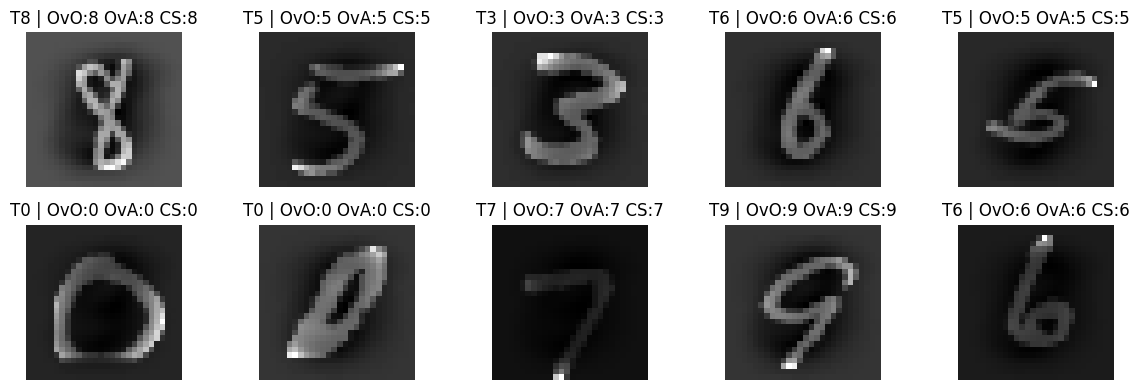

In [22]:

data = fetch_openml('mnist_784', version=1, as_frame=False)
X_full, y_full = data["data"], data["target"].astype(int)

limit = 500
indices = np.hstack([np.flatnonzero(y_full == i)[:limit] for i in range(10)])
X_subset, y_subset = X_full[indices], y_full[indices]

X_scaled = StandardScaler().fit_transform(X_subset)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_subset, test_size=0.3, stratify=y_subset, random_state=42
)

ova_models = {
    digit: SVC(kernel='rbf', C=10).fit(X_train, (y_train == digit).astype(int))
    for digit in range(10)
}

def ova_predict(X):
    decision_vals = np.column_stack([
        ova_models[d].decision_function(X) for d in range(10)
    ])
    return decision_vals.argmax(axis=1)

ovo_models = {}
for a in range(10):
    for b in range(a + 1, 10):
        filt = (y_train == a) | (y_train == b)
        X_pair = X_train[filt]
        y_pair = (y_train[filt] == a).astype(int)
        ovo_models[(a, b)] = SVC(kernel='linear', C=1).fit(X_pair, y_pair)

def ovo_predict(X):
    votes = np.zeros((X.shape[0], 10), dtype=int)
    for (i, j), model in ovo_models.items():
        preds = model.predict(X)
        votes[np.arange(X.shape[0]), np.where(preds == 1, i, j)] += 1
    return votes.argmax(axis=1)

crammer_model = LinearSVC(C=0.1, multi_class='crammer_singer',
                          max_iter=30000, tol=1e-4)
crammer_model.fit(X_train, y_train)

pred_ova = ova_predict(X_test)
pred_ovo = ovo_predict(X_test)
pred_crammer = crammer_model.predict(X_test)

def report(method, true_y, pred_y):
    print(f"\n{method}")
    print(f"accuracy      : {accuracy_score(true_y, pred_y):.4f}")
    print(f"precision (µ) : {precision_score(true_y, pred_y, average='macro'):.4f}")
    print(f"recall   (µ)  : {recall_score(true_y, pred_y, average='macro'):.4f}")
    print(f"f1-score (µ)  : {f1_score(true_y, pred_y, average='macro'):.4f}")
    print(f"confusion matrix:\n{confusion_matrix(true_y, pred_y)}\n")

report("OvA - RBF Kernel", y_test, pred_ova)
report("OvO - Linear Kernel", y_test, pred_ovo)
report("Crammer-Singer", y_test, pred_crammer)

np.random.seed(0)
sample_idxs = np.random.choice(len(X_test), size=10, replace=False)
sample_X = X_test[sample_idxs]
sample_y = y_test[sample_idxs]
preds_ova = pred_ova[sample_idxs]
preds_ovo = pred_ovo[sample_idxs]
preds_cs  = pred_crammer[sample_idxs]

plt.figure(figsize=(12, 4))
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    ax.imshow(sample_X[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f"T{sample_y[i]} | OvO:{preds_ovo[i]} OvA:{preds_ova[i]} CS:{preds_cs[i]}")
plt.tight_layout()
plt.show()
